In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import colorcet as cc
import plotly.express as px
from wordcloud import WordCloud # pip install wordcloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'newplot',
    'height': 500,
    'width': 900,
    'scale': 5 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [4]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

## Genre & Subgenre Analysis
### Subgenre Distributions
Previously, we have found out that the most frequent genre and subgenre in Spotify Top 200 Playlist 2017-2020 dataset is pop and dance pop. There are 21 genres and 1119 subgenres in total. Complementary to this, we tried to take a look at how many subgenres in a genre are in our dataset. At first, we thought that pop has the highest number of subgenres, but it turns out that else genre is the highest one, as you can see in the chart below.

In [5]:
df_genre_subgenre = df.groupby('genre')['sub_genre'].nunique().reset_index(name="total subgenre").sort_values('total subgenre', ascending=False)
df_genre_subgenre.style.hide_index()

In [6]:
fig = px.bar(df_genre_subgenre, x='total subgenre', y='genre',
             title='Total Subgenre per Genre',
             color='genre',
             hover_data=['total subgenre'], 
             orientation='h',
             height=500,
             width=900,
             labels={
                "total subgenre": "Total Subgenre",
                "genre": "Genre"
                },
             color_discrete_sequence=['teal'])
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

For that reason, we decided to take a look further into else and pop genre in the next section and also pick jazz as one of the genre that has a very few subgenres.

#### Else Genre
In the previous report, we stated that `else` subgenres are mostly "outliers" or unfamiliar in comparison with other subgenres. Hence, we find it interesting to see what are the most popular and frequent subgenres in else category, in hope we wouldn't find any common subgenre there.

In [7]:
# Else
df_else_count = df[df['genre'] == 'else'].groupby('sub_genre')['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)
fig = px.bar(df_else_count[:20], x='sub_genre', y='count',
             title='Top 20 Most Frequent Else Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "count": "Song Count"
                },
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

In [8]:
# Else
df_else_sum = df[df['genre'] == 'else'].groupby('sub_genre')['popularity'].sum().reset_index(name='popularity')
df_else_sum['popularity'] = (df_else_sum['popularity'] - df_else_sum['popularity'].min()) / (df_else_sum['popularity'].max() - df_else_sum['popularity'].min())
df_else_sum = df_else_sum.sort_values('popularity', ascending=False)[:20]
fig = px.bar(df_else_sum, x='sub_genre', y='popularity',
             title='Top 20 Most Popular Else Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "popularity": "Popularity"
                },
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

Unfortunately, we see the most frequent subgenre is Hollywood. This raises a question for us, isn't Hollywood supposed to be put under some popular genre, like pop? Therefore, we tried to deep dive into this Hollywood subgenre a little bit to see what kind of "Hollywood" songs are in our dataset.

In [9]:
df[df['sub_genre'] == 'hollywood'][['country', 'title', 'artist', 'sub_genre', 'album']].sample(5)

country                                        title  \
17200     Taiwan                               the other side   
73352      Italy   city of stars - from la la land soundtrack   
92645    Belgium  a lovely night - from la la land soundtrack   
92648  Indonesia  a lovely night - from la la land soundtrack   
25840    Belgium                             into the unknown   

                          artist  sub_genre  \
17200   Hugh Jackman - Zac Efron  hollywood   
73352  Ryan Gosling - Emma Stone  hollywood   
92645  Ryan Gosling - Emma Stone  hollywood   
92648  Ryan Gosling - Emma Stone  hollywood   
25840      Idina Menzel - AURORA  hollywood   

                                                   album  
17200  The Greatest Showman (Original Motion Picture ...  
73352         City Of Stars (From La La Land Soundtrack)  
92645    La La Land (Original Motion Picture Soundtrack)  
92648    La La Land (Original Motion Picture Soundtrack)  
25840  Frozen 2 (Original Motion Picture Soundtrack/D...

In [10]:
hollywood_records = len(df[df['sub_genre'] == 'hollywood'])

By looking at the samples in the right table, we can see that most of them are OST movie songs. This information adds another meaning to the Spotify subgenre classification that we didn't know before, songs that are released with specific intentions like for the movie OST are categorized under a certain subgenre, even though they are maybe a pop song in terms of musical properties. You can also see Broadway and Disney there, which are other OST movie categories.

However, the rest of the subgenres are very uncommon and we are confident enough to say that the other else category songs are well classified.


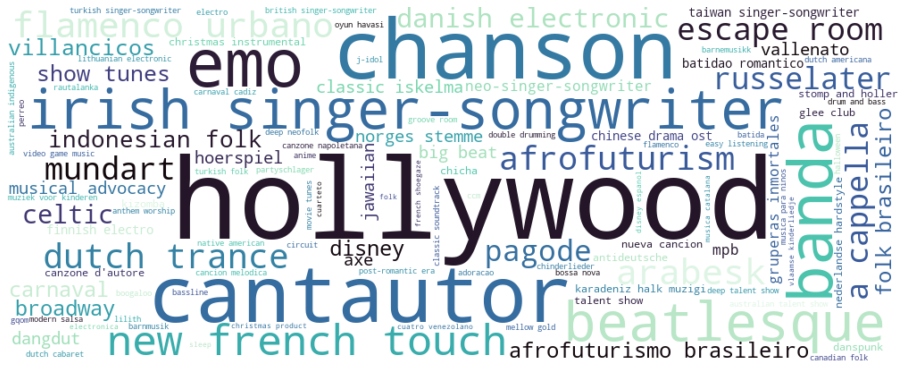

In [11]:
# method 1: convert to dict 
data = dict(zip(df_else_count['sub_genre'].tolist(), df_else_count['count'].tolist()))

# method 2: convert to dict
data = df_else_count.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="mako",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Pop Genre
Earlier we said that the most frequent subgenre in our dataset is dance pop. In this section, we want to see whether dance pop is also the most popular genre in pop besides it being the most frequent one.

In [12]:
# Pop
df_pop_sum = df[df['genre'] == 'pop'].groupby('sub_genre')['popularity'].sum().reset_index(name='popularity').sort_values('popularity', ascending=False)[:20]
df_pop_sum['popularity'] = (df_pop_sum['popularity'] - df_pop_sum['popularity'].min()) / (df_pop_sum['popularity'].max() - df_pop_sum['popularity'].min())
fig = px.bar(df_pop_sum, x='sub_genre', y='popularity',
             title='Top 20 Most Popular Pop Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "popularity": "Popularity"
                },
             color_discrete_sequence=px.colors.sequential.Darkmint)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

In [13]:
# Pop
df_pop_count = df[df['genre'] == 'pop'].groupby('sub_genre')['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)[:20]
fig = px.bar(df_pop_count, x='sub_genre', y='count',
             title='Top 20 Most Frequent Pop Subgenre',
             color='sub_genre',
             height=500,
             width=900,
             labels={
                "sub_genre": "Subgenre",
                "count": "Song Count"
                },
             color_discrete_sequence=px.colors.sequential.Darkmint)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update(layout_showlegend=False)
fig.show(config=config)

It can be seen that dance pop is also the most popular one here. Therefore, we can assume that there are many dance pop songs that are stayed longer in high positions so that their popularity score is very high. This leads us to our possibly next exploration like which genre is usually stayed in the top 5 position of the Spotify playlist.

Similarly, both popular and frequent charts also show the same subgenre in the second position, which is pop itself. But, the rest are mostly some specific country subgenres and the distributions are almost the same for each subgenre.

#### Jazz Genre
Last genre that we'll talk about is jazz. It only has 7 subgenres so we think that it's easier to read the distributions of subgenre from a pie chart as below.

In [14]:
# Jazz
df_jazz_sum = df[df['genre'] == 'jazz'].groupby('sub_genre')['popularity'].sum().reset_index(name='sum popularity')
fig = px.pie(df_jazz_sum, values='sum popularity', names='sub_genre',
             title='Distributions of Jazz Subgenre by Popularity',
             hover_data=['sum popularity'], labels={'sub_genre':'Subgenre'},
             height=500,
             width=800,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend={
        'y':0.9,
        'x':1.3,
        'xanchor': 'right',
        'yanchor': 'top'})
fig.show(config=config)

In [15]:
# Jazz
df_jazz_count = df[df['genre'] == 'jazz'].groupby('sub_genre')['sub_genre'].count().reset_index(name='count')
fig = px.pie(df_jazz_count, values='count', names='sub_genre',
             title='Distributions of Jazz Subgenre by Song Count',
             hover_data=['count'], labels={'sub_genre':'Subgenre'},
             height=500,
             width=800,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend={
        'y':0.9,
        'x':1.2,
        'xanchor': 'right',
        'yanchor': 'top'})
fig.show(config=config)

Both charts surprisingly have the same pattern as pop genre that the same subgenre comes in both first and second position either calculated by popularity or song frequency. We can also see that indonesian jazz is very popular, even the sum of popularity score is more than 70% of the whole score of jazz subgenres.

#### Conclusion
Some songs under else subgenre are not really "outlier" or even could be categorized under the pop genre in terms of musical properties, but they are intentionally released for another work, such as the movie OST. So, in the upcoming weeks, we will discuss further whether we should take else genre into account for model training since logically, we could only identify the genre song by its song properties in our dataset.

### Genre Trends per Country
Spotify has made it easier for countries around the world to listen to each other's music. This easy access has raised questions about streaming's impact on their preferences for local or global content. In this part, we wanted to find that preferences by genre and subgenre and see whether the language affects their preference music taste during 2017-2020. Therefore, here we will analyze 3 countries: Global as the general representative of all countries where Spotify operated, USA as English speaking country, and Germany as a non-English speaking country.

In [16]:
df_genre_country = df[(df['country'] == 'Global') | (df['country'] == 'USA') | (df['country'] == 'Germany')].groupby(['country', 'genre'])['genre'].count().reset_index(name='count')
df_genre_country.sort_values(by=['count'], ascending=False, inplace=True)
df_genre_country.head(5)

country    genre  count
5   Germany  hip hop   3006
41      USA  hip hop   1972
48      USA      pop   1800
30   Global      pop   1706
11  Germany      pop   1507

In [17]:
colors = {'Germany': '#2c728e',
          'USA': '#28ae80',
          'Global': '#addc30'}
fig = px.bar(df_genre_country, x="genre", y="count",
             color='country', barmode='group',
             title='Genre Trends in Germany, USA and Global',
             height=500,
             color_discrete_map=colors,
             labels={
                "genre": "Genre",
                "count": "Song Count"
                })
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show(config=config)

As you can see in the chart above, all of them have the same genre trends in general. Hip hop, pop, and rap come in the top 3 positions. Meanwhile, for the rest genres, there are only a few (under 500) that are in the Top 200 Spotify Playlist 2017-2020.

#### Global

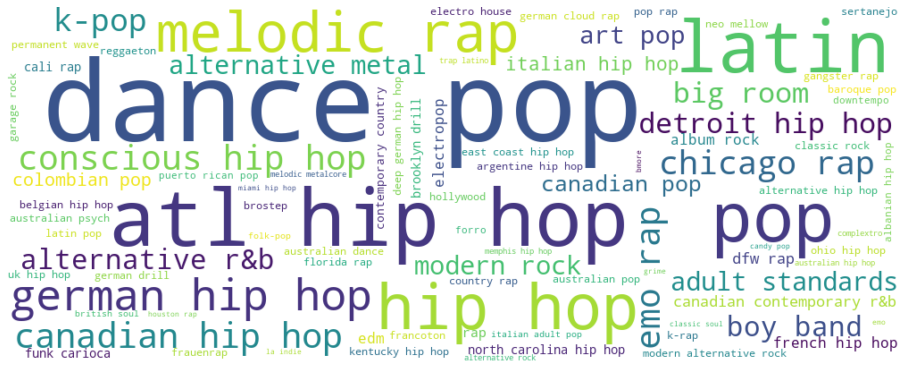

In [18]:
df_subgenre_gl = df[df['country'] == 'Global'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_gl['sub_genre'].tolist(), df_subgenre_gl['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_gl.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### USA

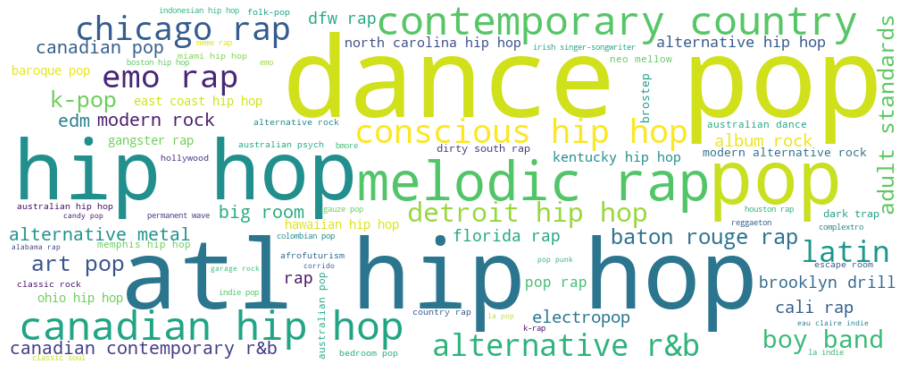

In [19]:
df_subgenre_us = df[df['country'] == 'USA'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_us['sub_genre'].tolist(), df_subgenre_us['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_us.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Germany

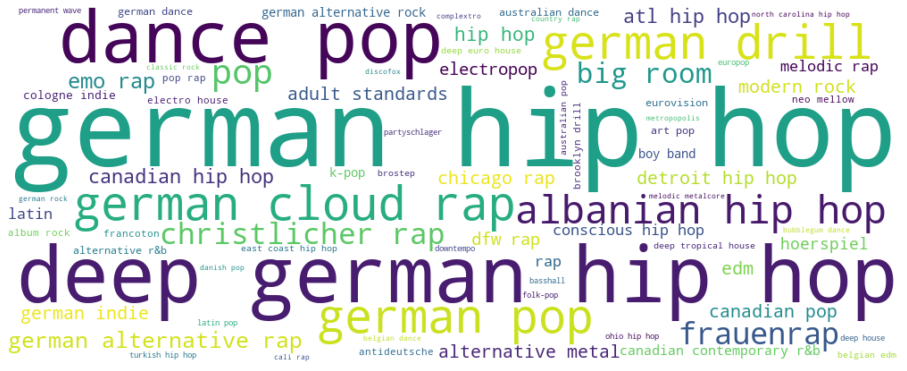

In [20]:
df_subgenre_de = df[df['country'] == 'Germany'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_de['sub_genre'].tolist(), df_subgenre_de['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_de.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

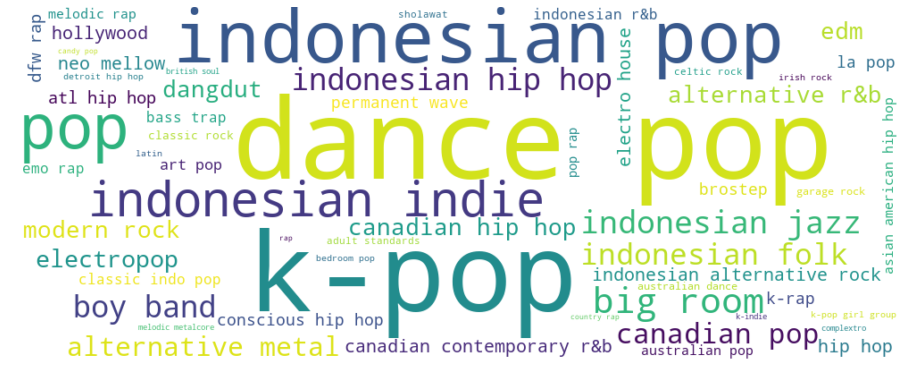

In [21]:
df_subgenre_in = df[df['country'] == 'Indonesia'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_in['sub_genre'].tolist(), df_subgenre_in['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_in.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

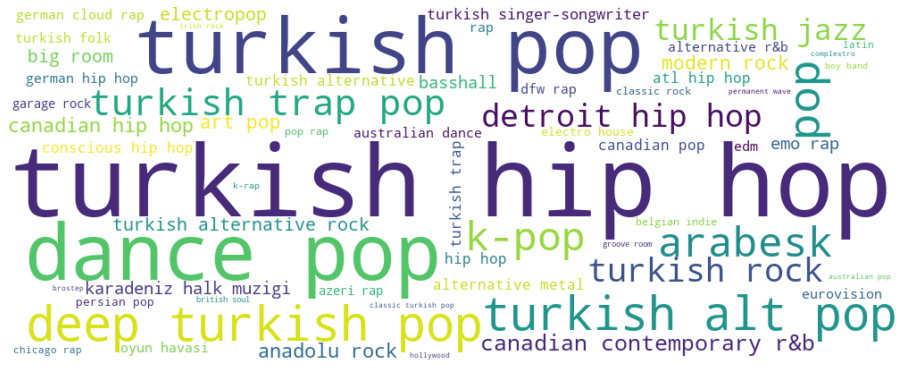

In [22]:
df_subgenre_tr = df[df['country'] == 'Turkey'].groupby(['sub_genre'])['sub_genre'].count().reset_index(name='count').sort_values('count', ascending=False)

# method 1: convert to dict 
data = dict(zip(df_subgenre_tr['sub_genre'].tolist(), df_subgenre_tr['count'].tolist()))

# method 2: convert to dict
data = df_subgenre_tr.set_index('sub_genre').to_dict()['count']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=1000, height=400, colormap="viridis",
                        min_font_size=8, max_font_size=125).generate_from_frequencies(data)

# Display the generated image:
plt.figure( figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Observations
Both Global and USA don't really have a significant difference in their subgenre trends. We can clearly see that many songs under subgenre dance-pop, hip hop, and Atlanta hip hop in both Global and USA, and also other US local subgenres, like Chicago rap, Canadian hip hop, etc. On the other hand, in Germany, many subgenres appear with the prefix "german" which we can assume that their local songs are dominant in the Top 200 Spotify Playlist. Looking back to our question about "Does the country language affect their preference music taste?", it shows that the top subgenres in both Germany and USA, are all their local songs. But, this is just a preliminary answer for now, because there are still many non-English speaking countries registered on Spotify.

#### Conclusion
* In general, Global, USA, and Germany have the same taste in music, at least for 2017-2020 because they have the same top genre trends during that time.
* Both Global and USA have mostly the same subgenre trends and it's also US local-oriented, like Atlanta hip hop, Latin, and Chicago rap. Germany has totally different subgenres, which are all german songs mostly. So, US and Germany prefer to listen to their local songs in their country language at least from 2017-to 2020.

In [23]:
song_prop_columns = ["energy", "danceability", "valence", "liveness", "acoustics", "instrumentalness", "speechiness", "loudness", "tempo"]
df['loudness'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
df['tempo'] = (df['tempo'] - df['tempo'].min()) / (df['tempo'].max() - df['tempo'].min())
df_song_props = df.groupby(['genre'])[song_prop_columns].mean().reset_index()

In [24]:
fig = px.bar(df_song_props, x='genre', y=song_prop_columns, barmode='group', 
             color_discrete_sequence=px.colors.diverging.BrBG_r,
             title="Genre Characteristics")

fig.update_layout(
    legend_title="Song Properties"
)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600
)

fig.show()

In [25]:
print("Highest energy: ", df_song_props[df_song_props['energy'] == df_song_props['energy'].max()]['genre'])
print("Highest danceability: ", df_song_props[df_song_props['danceability'] == df_song_props['danceability'].max()]['genre'])
print("Highest valence: ", df_song_props[df_song_props['valence'] == df_song_props['valence'].max()]['genre'])
print("Highest liveness: ", df_song_props[df_song_props['liveness'] == df_song_props['liveness'].max()]['genre'])
print("Highest acoustics: ", df_song_props[df_song_props['acoustics'] == df_song_props['acoustics'].max()]['genre'])
print("Highest instrumentalness: ", df_song_props[df_song_props['instrumentalness'] == df_song_props['instrumentalness'].max()]['genre'])
print("Highest speechiness: ", df_song_props[df_song_props['speechiness'] == df_song_props['speechiness'].max()]['genre'])
print("Highest loudness: ", df_song_props[df_song_props['loudness'] == df_song_props['loudness'].max()]['genre'])
print("Highest tempo: ", df_song_props[df_song_props['tempo'] == df_song_props['tempo'].max()]['genre'])

Highest energy:  12    metal
Name: genre, dtype: object
Highest danceability:  18    reggaeton
Name: genre, dtype: object
Highest valence:  5    funk
Name: genre, dtype: object
Highest liveness:  12    metal
Name: genre, dtype: object
Highest acoustics:  9    jazz
Name: genre, dtype: object
Highest instrumentalness:  12    metal
Name: genre, dtype: object
Highest speechiness:  20    trap
Name: genre, dtype: object
Highest loudness:  10    k-pop
Name: genre, dtype: object
Highest tempo:  11    latin
Name: genre, dtype: object


In [26]:
print("Lowest energy: ", df_song_props[df_song_props['energy'] == df_song_props['energy'].min()]['genre'])
print("Lowest danceability: ", df_song_props[df_song_props['danceability'] == df_song_props['danceability'].min()]['genre'])
print("Lowest valence: ", df_song_props[df_song_props['valence'] == df_song_props['valence'].min()]['genre'])
print("Lowest liveness: ", df_song_props[df_song_props['liveness'] == df_song_props['liveness'].min()]['genre'])
print("Lowest acoustics: ", df_song_props[df_song_props['acoustics'] == df_song_props['acoustics'].min()]['genre'])
print("Lowest instrumentalness: ", df_song_props[df_song_props['instrumentalness'] == df_song_props['instrumentalness'].min()]['genre'])
print("Lowest speechiness: ", df_song_props[df_song_props['speechiness'] == df_song_props['speechiness'].min()]['genre'])
print("Lowest loudness: ", df_song_props[df_song_props['loudness'] == df_song_props['loudness'].min()]['genre'])
print("Lowest tempo: ", df_song_props[df_song_props['tempo'] == df_song_props['tempo'].min()]['genre'])

Lowest energy:  13    opm
Name: genre, dtype: object
Lowest danceability:  0    bolero
Name: genre, dtype: object
Lowest valence:  13    opm
Name: genre, dtype: object
Lowest liveness:  13    opm
Name: genre, dtype: object
Lowest acoustics:  12    metal
Name: genre, dtype: object
Lowest instrumentalness:  1    boy band
Name: genre, dtype: object
Lowest speechiness:  2    country
Name: genre, dtype: object
Lowest loudness:  9    jazz
Name: genre, dtype: object
Lowest tempo:  9    jazz
Name: genre, dtype: object


In [27]:
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Energy", "Loudness", "Speechiness", "Acoustics"),
    shared_xaxes=True,
    vertical_spacing=0.09
)

z=np.arange(21)

# Add traces
fig.add_trace(go.Bar(x=df_song_props['genre'], y=df_song_props['energy'], marker=dict(color = z,
                     colorscale='viridis')), row=1, col=1)
fig.add_trace(go.Bar(x=df_song_props['genre'], y=df_song_props['loudness'], marker=dict(color = z,
                     colorscale='viridis')), row=1, col=2)
fig.add_trace(go.Bar(x=df_song_props['genre'], y=df_song_props['speechiness'], marker=dict(color = z,
                     colorscale='viridis')), row=2, col=1)
fig.add_trace(go.Bar(x=df_song_props['genre'], y=df_song_props['acoustics'], marker=dict(color = z,
                     colorscale='viridis')), row=2, col=2)

# Update title and height
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, height=700)

fig.show(config=config)

Based on the charts, loudness doesn't seem to have a specific pattern for any genre, it's all uniformly distributed for all genres. After doing some research, we found out that the Spotify itself adjusted the loudness of every song they received, so they are all in the same range and acceptable for our ears, you can see the detail here.

For energy, as we expected, metal has the highest value and rock songs also have a quite high value here. The lowest energy comes from OPM, which stands for Original Pilipino Music, originally referred only to a genre of Philippine pop songs, mostly ballads. And, jazz is also one of those that have low values of energy.

As for speechiness, in a simple meaning, that's a kind of song that has many lyrics rather than instrument sounds. It turns out that trap has the highest value, and trap is a subgenre of hip hop music that originated in the Southern United States (source: wikipedia). Even though our assumption is wrong, it's actually in the right direction, and rap is in the 3rd top position there.

We didn't make any assumption about acoustics, and it turns out that jazz and OPM have the highest value there, just like the opposite of energy value.

#### Conclusions
Loudness has no significant pattern since all songs are pre-processed first by Spotify before being delivered to the listener. However, other song properties have a certain pattern for a specific genre, such as metal has high energy, jazz & OPM has high acoustics and trap has high speechiness.